In [2]:
import pandas as pd
sampledf = pd.read_csv('./sampledfwithpdflinks.csv')
cols_desired = ['id','cg_websites','g_websites','cg_whitep','g_whitep','googlepdflink']
sampledf = sampledf[cols_desired]


Convert 'string lists' to lists.

In [3]:
cols = list(sampledf)[1:-1]
for col in cols:
    sampledf[col] = sampledf[col].apply(eval)

Count the length of the lists in each entry

In [46]:
cols = list(sampledf)[1:-2]
countdf = sampledf[cols].applymap(lambda x : len(x))

#Count how many links in each entry contain the pdf extension.
def ispdf(x):
    cnt = 0
    for elem in x:
        if '.pdf' in elem:
            cnt += 1
    return cnt

dfispdf = sampledf[cols].applymap(ispdf)

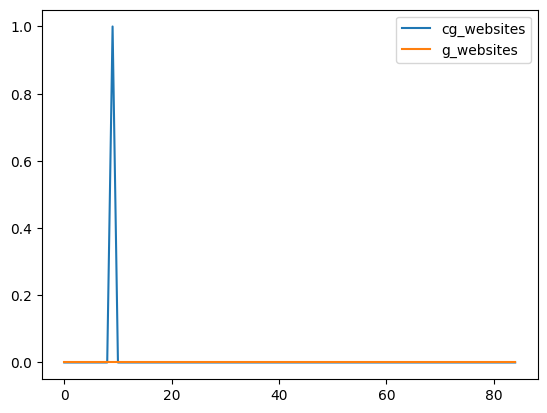

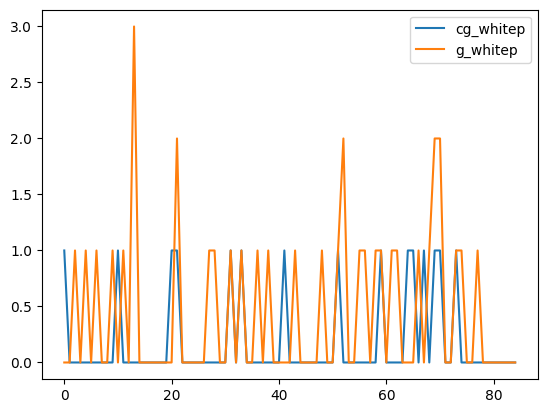

In [11]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
for col in ['cg_websites','g_websites']:
    ax.plot(list(range(len(countdf))), list(dfispdf[col]),label = col)
plt.legend()
plt.show()
fig, ax = plt.subplots()
for col in ['cg_whitep','g_whitep']:
    ax.plot(list(range(len(countdf))), list(dfispdf[col]),label = col)
plt.legend()
plt.show()

In [16]:
def contains_gitbook(x):
    cnt = 0
    for elem in x:
        if 'gitbook' in elem:
            cnt +=1
    return cnt
containgitbookdf = sampledf[cols].applymap(contains_gitbook)

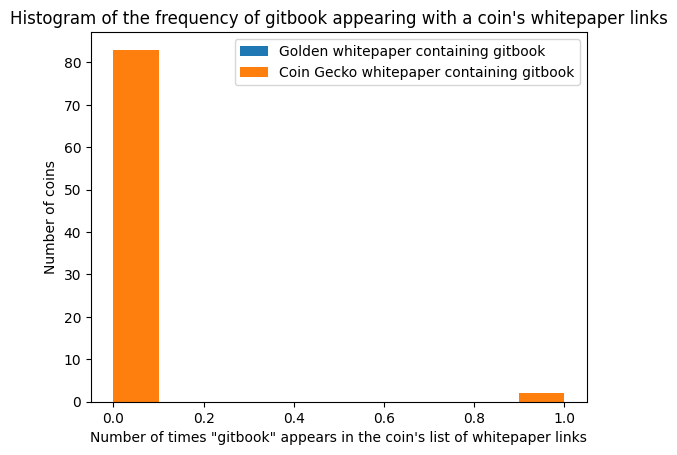

In [21]:
plt.hist(containgitbookdf['g_whitep'],label = 'Golden whitepaper containing gitbook')
plt.hist(containgitbookdf['cg_whitep'],label = 'Coin Gecko whitepaper containing gitbook')
plt.title("Histogram of the frequency of gitbook appearing with a coin's whitepaper links")
plt.xlabel('Number of times "gitbook" appears in the coin\'s list of whitepaper links')
plt.ylabel("Number of coins")
plt.legend()
plt.show()

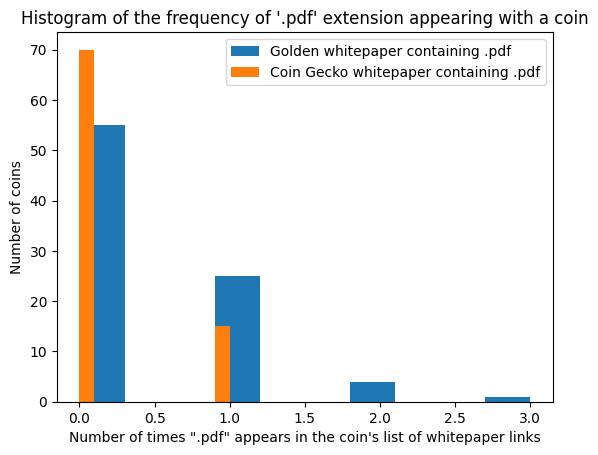

In [13]:
plt.hist(dfispdf['g_whitep'],label = 'Golden whitepaper containing .pdf')
plt.hist(dfispdf['cg_whitep'],label = 'Coin Gecko whitepaper containing .pdf')
plt.title("Histogram of the frequency of '.pdf' extension appearing with a coin")
plt.xlabel('Number of times ".pdf" appears in the coin\'s list of whitepaper links')
plt.ylabel("Number of coins")
plt.legend()
plt.show()

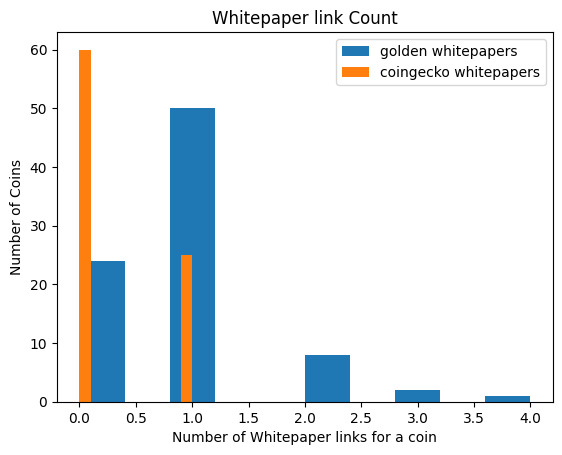

In [22]:
plt.hist(countdf['g_whitep'],label = 'golden whitepapers')
plt.hist(countdf['cg_whitep'],label = 'coingecko whitepapers')
plt.title("Whitepaper link Count")
plt.ylabel("Number of Coins")
plt.xlabel('Number of Whitepaper links for a coin')
plt.legend()
plt.savefig('./WhitepaperCount.png')
plt.show()

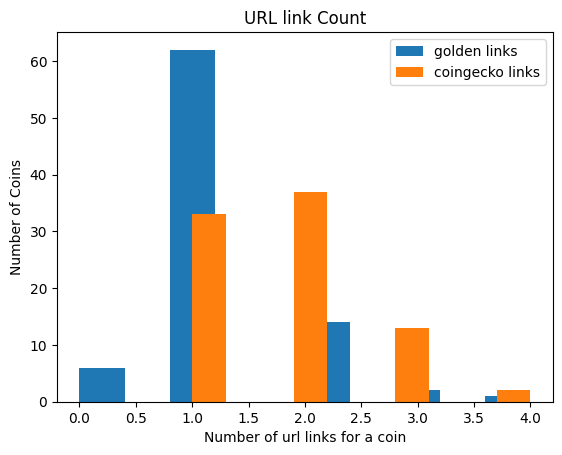

In [23]:
plt.hist(countdf['g_websites'],label = 'golden links')
plt.hist(countdf['cg_websites'],label = 'coingecko links')
plt.title("URL link Count")
plt.ylabel("Number of Coins")
plt.xlabel('Number of url links for a coin')
plt.legend()
plt.savefig('./URLCount.png')
plt.show()

In [36]:
sampledf

,id,cg_websites,g_websites,cg_whitep,g_whitep,googlepdflink,market_cap_rank
0,one-ledger,['https://oneledger.io/'],['https://oneledger.io'],['https://oneledger.io/wp-content/uploads/2018...,['https://docs.oneledger.io/'],NaN,1628.0
1,redacted,"['https://redacted.finance/', 'https://app.red...","['https://app.redacted.finance', 'https://reda...",[],['https://redacted-cartel.gitbook.io/redacted/'],https://nhsforthvalley.com/wp-content/uploads/...,489.0
2,spacen,['https://www.spacen.xyz/'],['https://www.spacen.xyz/'],[],['https://www.spacen.xyz/doc/SpaceN%20whitepap...,NaN,898.0
3,ssv-network,"['https://ssv.network/', 'https://medium.com/b...",[],[],[],NaN,188.0
4,cortex,['http://www.cortexlabs.ai/'],['https://www.cortexlabs.ai/'],['https://drive.google.com/file/d/1B01q8NZC3qq...,['https://www.cortexlabs.ai/Cortex_AI_on_Block...,https://isacala.org/wp-content/uploads/2020/08...,500.0
...,...,...,...,...,...,...,...
80,kalmar,"['https://kalmy.app/#/swap', 'https://blog.kal...",['http://www.am1290thegift.com/'],[],[],NaN,853.0
81,stfx,['https://www.stfx.io/'],['https://www.stfx.io/'],[],['https://docs.stfx.io/'],NaN,1613.0
82,bolide,['https://bolide.fi/'],"['http://app.bolide.fi', 'https://bolide.fi']",[],['https://docs.bolide.fi/'],NaN,410.0
83,connect-financial,"['https://www.connect.financial/', 'https://co...",['https://connect.financial'],[],['https://connect.financial/media/cf-whitepape...,NaN,1915.0


In [30]:
cols

['cg_websites', 'g_websites', 'cg_whitep', 'g_whitep', 'googlepdflink']

In [4]:
sampledf

,id,cg_websites,g_websites,cg_whitep,g_whitep,googlepdflink
0,one-ledger,[https://oneledger.io/],[https://oneledger.io],[https://oneledger.io/wp-content/uploads/2018/...,[https://docs.oneledger.io/],NaN
1,redacted,"[https://redacted.finance/, https://app.redact...","[https://app.redacted.finance, https://redacte...",[],[https://redacted-cartel.gitbook.io/redacted/],https://nhsforthvalley.com/wp-content/uploads/...
2,spacen,[https://www.spacen.xyz/],[https://www.spacen.xyz/],[],[https://www.spacen.xyz/doc/SpaceN%20whitepape...,NaN
3,ssv-network,"[https://ssv.network/, https://medium.com/blox...",[],[],[],NaN
4,cortex,[http://www.cortexlabs.ai/],[https://www.cortexlabs.ai/],[https://drive.google.com/file/d/1B01q8NZC3qq_...,[https://www.cortexlabs.ai/Cortex_AI_on_Blockc...,https://isacala.org/wp-content/uploads/2020/08...
...,...,...,...,...,...,...
80,kalmar,"[https://kalmy.app/#/swap, https://blog.kalmar...",[http://www.am1290thegift.com/],[],[],NaN
81,stfx,[https://www.stfx.io/],[https://www.stfx.io/],[],[https://docs.stfx.io/],NaN
82,bolide,[https://bolide.fi/],"[http://app.bolide.fi, https://bolide.fi]",[],[https://docs.bolide.fi/],NaN
83,connect-financial,"[https://www.connect.financial/, https://conne...",[https://connect.financial],[],[https://connect.financial/media/cf-whitepaper...,NaN
